In [4]:
import fbprophet 

In [5]:
from fbprophet import Prophet

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('C:/Users/vedan/Downloads/covid_19_clean_complete.csv')

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [11]:
df['Date'].nunique()

188

In [12]:
data=df.groupby(df['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

<ipython-input-12-51a1e550c1a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(df['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


In [13]:
data.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [14]:
df1=data.rename(columns={'Date':'ds','Confirmed':'y'})

In [15]:
df1.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [16]:
m=Prophet()

In [17]:
model=m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
future_global=model.make_future_dataframe(periods=30,freq='D')

In [20]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [21]:
future_global.shape

(218, 1)

In [22]:
predictions=model.predict(future_global)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.173480e+05,9.342996e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.135792e+05,9.266637e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-1.072042e+05,1.017124e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.287379e+04,1.197760e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-1.049752e+05,1.150424e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.107921e+07,2.180658e+07,2.106651e+07,2.177477e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.124118e+07,2.202998e+07,2.124538e+07,2.200705e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.142619e+07,2.223779e+07,2.142173e+07,2.222629e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.157447e+07,2.244933e+07,2.160522e+07,2.246112e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [23]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.107921e+07,2.180658e+07
214,2020-08-23,2.165190e+07,2.124118e+07,2.202998e+07
215,2020-08-24,2.184658e+07,2.142619e+07,2.223779e+07
216,2020-08-25,2.203598e+07,2.157447e+07,2.244933e+07
217,2020-08-26,2.224593e+07,2.175090e+07,2.270050e+07


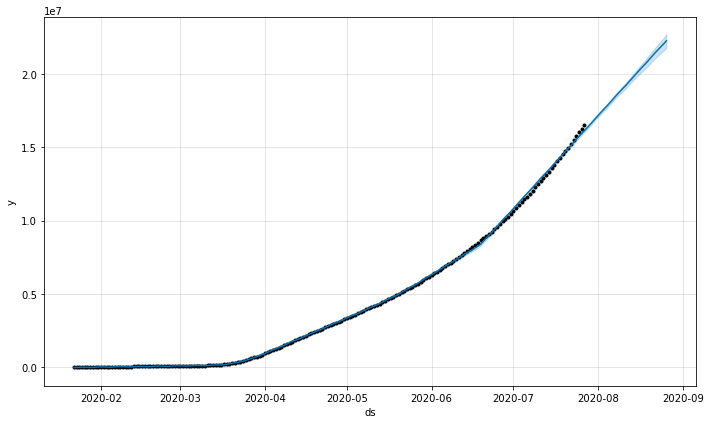

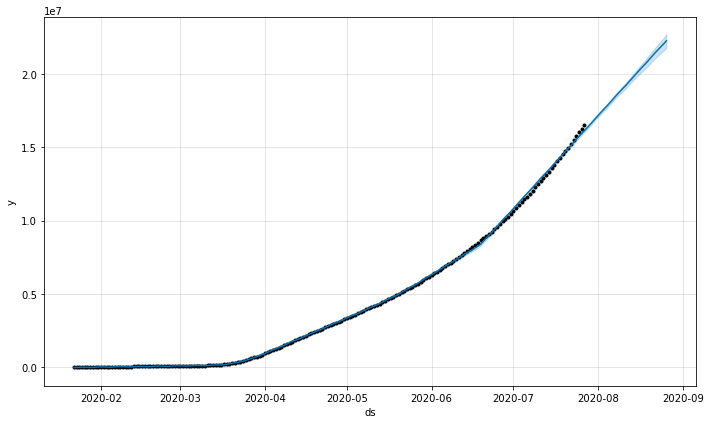

In [24]:
model.plot(predictions)

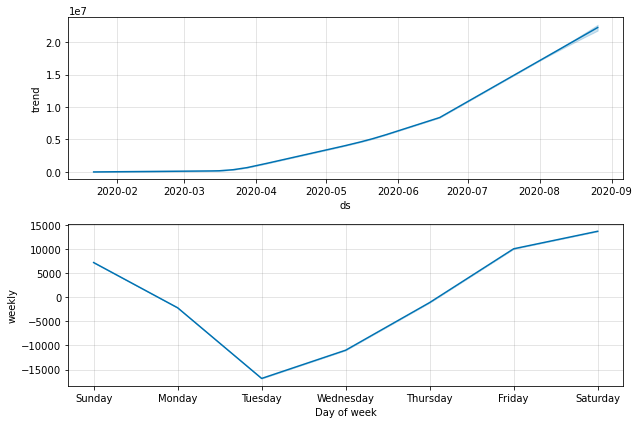

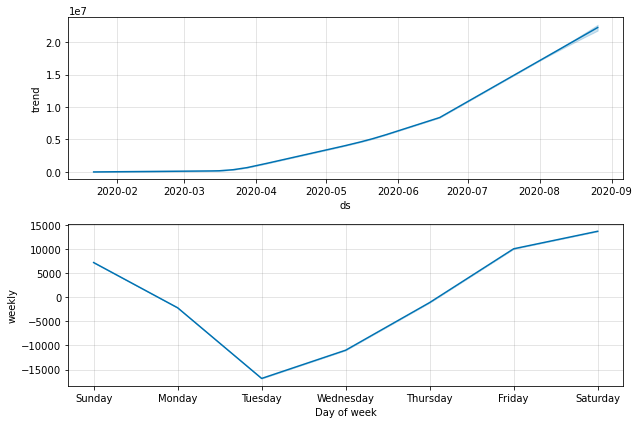

In [26]:
model.plot_components(predictions)

In [27]:
from fbprophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x2872d13fdc0>],

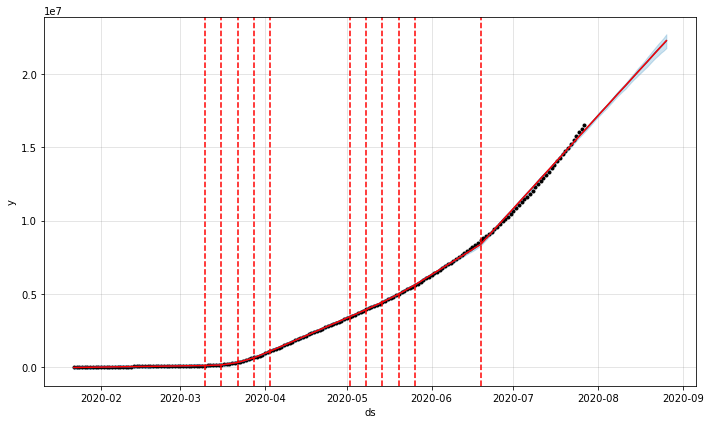

In [28]:
fig=model.plot(predictions)
add_changepoints_to_plot(fig.gca(),model,predictions)

In [30]:
 from fbprophet.diagnostics import cross_validation

In [32]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195662e+06,3.205933e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279461e+06,3.290801e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.362117e+06,3.377450e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439239e+06,3.462024e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.512011e+06,3.545198e+06,3515244,2020-04-28


In [34]:
from fbprophet.diagnostics import performance_metrics

In [35]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


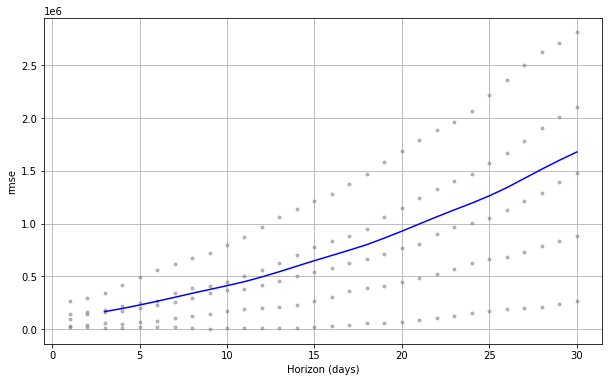

In [37]:
from fbprophet.plot import plot_cross_validation_metric
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

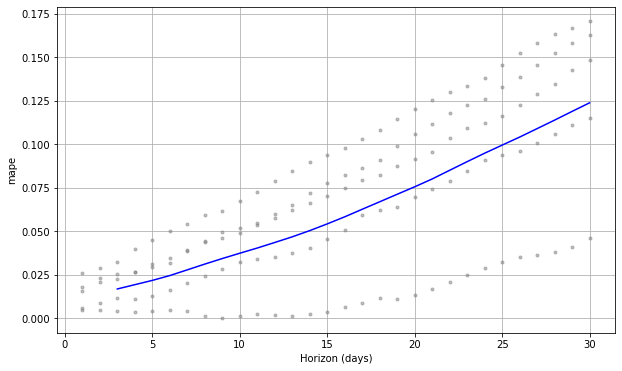

In [39]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')